# Statistic training does not produce sequences
This notebook is to illustrate the fact that if you traing your patterns statistically you will not get the sequences.

We start as usual by loading required libraries

In [1]:
from __future__ import print_function
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable

from connectivity_functions import get_beta, get_w
from connectivity_functions import calculate_probability, calculate_coactivations
from data_transformer import build_ortogonal_patterns
from network import BCPNN

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# np.set_printoptions(suppress=True)

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

#### Git loading
After that we load the right versioning system to assure that we have the right

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '959651d65e673176e9d41650963a8725db388ab2'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

Let's first build and run the neural network.

In [3]:
hypercolumns = 10
minicolumns = 10
N = 10  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:N]

p = calculate_probability(patterns)
P = calculate_coactivations(patterns)

beta = get_beta(p)
w = get_w(P, p)

dt = 0.001
T = 50.0
time = np.arange(0, T + dt, dt)

nn = BCPNN(hypercolumns, minicolumns, beta=beta, w=w)
nn.randomize_pattern()
history = nn.run_network_simulation(time, save=True)

Then we plot the results

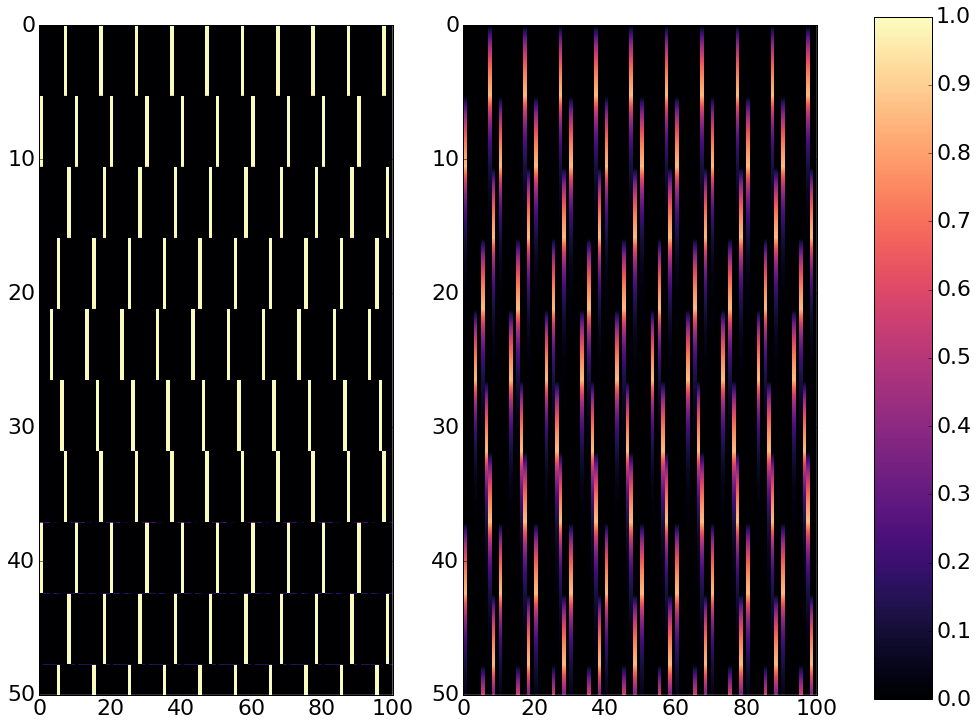

In [4]:
# Plot everything
cmap = 'magma'
extent = [0, minicolumns * hypercolumns, T, 0]
fig = plt.figure(figsize=(16 ,12))

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

plt.show()

What see here is the a neural network that was trained by the static process (in opposition to the dynamic one). Just after this we run the network for 50 seconds. We see that the network 